[![Binder](https://mybinder.org/badge_logo.svg)](https://notebooks.gesis.org/binder/v2/gh/jolin-io/workshop-julia-for-kaggle/main?filepath=introduction.ipynb)

<a href="https://www.jolin.io" target="_blank" rel="noreferrer noopener">
<img src="https://www.jolin.io/assets/Jolin/Jolin-Banner-Website-v1.1-darkmode.webp">
</a>

# Call me Stephan

Hi there, I am Stephan Sahm, founder of [Jolin.io](www.jolin.io) consulting and organizer of the [Julia User Group Munich](https://www.meetup.com/julia-user-group-munich/).

We at [Jolin.io](www.jolin.io) bring Julia into production.

# Why Julia

- **R** is lovely for statistics and reports, the language and the whole community is build for it and has excellent support
- **Python** is your tool if you want to have things done, it has the largest package ecosystem of all languages
- **Julia** is made for high performance computing

Think of Julia as the new Fortran
- excellent runtime performance (like Fortran)
- high level language (actually Fortran also tries to be high-level, it just doesn't match today's standards)

# Julia 101

Julia is really simple

In [2]:
array = [
    1 2
    3 4
]

2×2 Matrix{Int64}:
 1  2
 3  4

In [10]:

bigarray = [
    array        array .* 10
    1 ./ array   zeros(2, 2)
]

4×4 Matrix{Float64}:
 1.0       2.0   10.0  20.0
 3.0       4.0   30.0  40.0
 1.0       0.5    0.0   0.0
 0.333333  0.25   0.0   0.0

In [8]:
function myfunction(x)
    if x > 3
        "big"
    else
        "small"
    end
end

myfunction (generic function with 1 method)

In [11]:
myfunction.(bigarray)

4×4 Matrix{String}:
 "small"  "small"  "big"    "big"
 "small"  "big"    "big"    "big"
 "small"  "small"  "small"  "small"
 "small"  "small"  "small"  "small"

## Julia's top ingredients 1/2: `structs`

composed data types with speed like c

In [12]:
struct Cat
	name
end

struct Dog
    # :: type annotations
	name::String
	age::Int
end

In [18]:
🐱 = Cat("kitty")
🐕 = Dog("dexter", 2)

🐱.name, 🐕.name, 🐕.age

("kitty", "dexter", 2)

## Julia's top ingredients 2/2: `functions`

overloadable functions with runtime dispatch

In [25]:
describe(animal) = "This is $(animal.name)"

describe(🐕)

"This is dexter"

In [27]:
meet(animal1, animal2) = "$(animal1.name) meets $(animal2.name)"

meet(🐕, 🐱)

"dexter meets kitty"

In [28]:
function our_little_story(animal1, animal2)
	return [
		describe(animal1)
		describe(animal2)
		meet(animal1, animal2)
	]
end

our_little_story(🐱, 🐕)

3-element Vector{String}:
 "This is kitty"
 "This is dexter"
 "kitty meets dexter"

In [31]:
describe(dog::Dog) = "This is $(dog.name) and it is $(dog.age) years old"

meet(cat::Cat, dog::Dog) = "The awesome cat $(cat.name) meets our $(dog.age) years old dog $(dog.name)."

our_little_story(🐱, 🐕)

3-element Vector{String}:
 "This is kitty"
 "This is dexter and it is 2 years old"
 "The awesome cat kitty meets our 2 years old dog dexter."

### A little challenge for you

Define a duck 🦆 and tell a story about your duck meeting kitty 🐱 or dexter 🐕, your choice

In [ ]:
# your space
# ...

# Julia Deep Learning

The whole julia language is auto-differentiable.


Here a cpu version of the [quickstart example](https://fluxml.ai/Flux.jl/stable/models/quickstart/) from [Flux.jl](https://github.com/FluxML/Flux.jl)

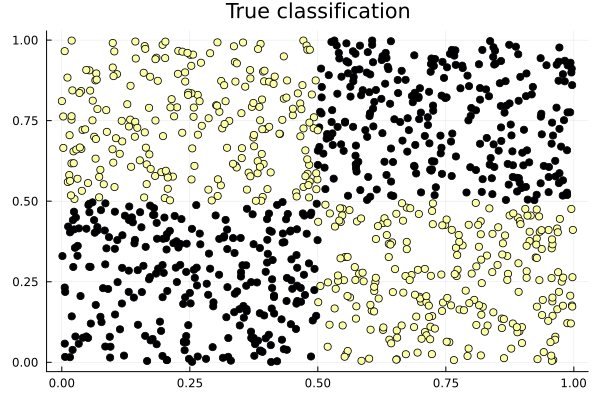

In [35]:
using Flux, Statistics, ProgressMeter, Plots

# Generate some data for the XOR problem: vectors of length 2, as columns of a matrix:
noisy = rand(Float32, 2, 1000)                                    # 2×1000 Matrix{Float32}
truth = [xor(col[1]>0.5, col[2]>0.5) for col in eachcol(noisy)]   # 1000-element Vector{Bool}

scatter(noisy[1,:], noisy[2,:], zcolor=truth, title="True classification", legend=false)

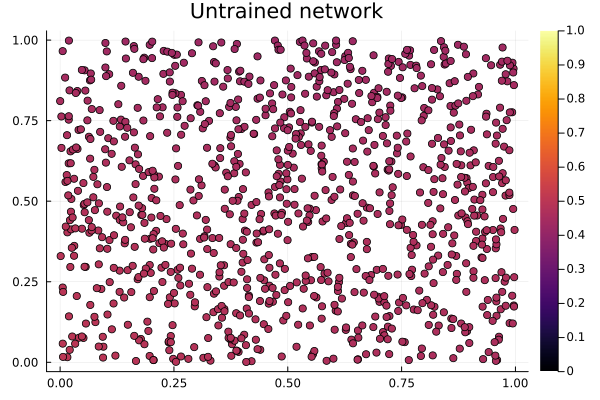

In [82]:
model = Chain(
    Dense(2 => 3, tanh),   # activation function inside layer
    BatchNorm(3),
    Dense(3 => 2),
    softmax
)

# The model encapsulates parameters, randomly initialised. Its initial output is:
out1 = model(noisy)
scatter(noisy[1,:], noisy[2,:], zcolor=out1[1,:], title="Untrained network", label="", clims=(0,1))

In [83]:
# To train the model, we use batches of 64 samples, and one-hot encoding:
target = Flux.onehotbatch(truth, [true, false]) # 2×1000 OneHotMatrix
loader = Flux.DataLoader((noisy, target), batchsize=64, shuffle=true);
# 16-element DataLoader with first element: (2×64 Matrix{Float32}, 2×64 OneHotMatrix)

losses = []  # will store training progress
optim = Flux.setup(Flux.Adam(0.01), model)  # will store optimiser momentum, etc.

(layers = ((weight = Leaf(Adam{Float64}(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0 0.0; 0.0 0.0; 0.0 0.0], Float32[0.0 0.0; 0.0 0.0; 0.0 0.0], (0.9, 0.999))), bias = Leaf(Adam{Float64}(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0], (0.9, 0.999))), σ = ()), (λ = (), β = Leaf(Adam{Float64}(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0], (0.9, 0.999))), γ = Leaf(Adam{Float64}(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0], (0.9, 0.999))), μ = (), σ² = (), ϵ = (), momentum = (), affine = (), track_stats = (), active = (), chs = ()), (weight = Leaf(Adam{Float64}(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0 0.0 0.0; 0.0 0.0 0.0], Float32[0.0 0.0 0.0; 0.0 0.0 0.0], (0.9, 0.999))), bias = Leaf(Adam{Float64}(0.01, (0.9, 0.999), 1.0e-8), (Float32[0.0, 0.0], Float32[0.0, 0.0], (0.9, 0.999))), σ = ()), ()),)

Progress:   0%|▏                                        |  ETA: 0:01:46

Progress:   2%|▊                                        |  ETA: 0:00:16

Progress:   4%|█▌                                       |  ETA: 0:00:11

Progress:   5%|██▎                                      |  ETA: 0:00:10

Progress:   7%|██▉                                      |  ETA: 0:00:09

Progress:   8%|███▌                                     |  ETA: 0:00:09

Progress:  10%|████                                     |  ETA: 0:00:08

Progress:  12%|████▊                                    |  ETA: 0:00:08

Progress:  13%|█████▍                                   |  ETA: 0:00:08

Progress:  15%|██████                                   |  ETA: 0:00:07

Progress:  17%|██████▉                                  |  ETA: 0:00:07

Progress:  19%|███████▋                                 |  ETA: 0:00:06

Progress:  21%|████████▌                                |  ETA: 0:00:06

Progress:  23%|█████████▍                               |  ETA: 0:00:06

Progress:  25%|██████████▏                              |  ETA: 0:00:05

Progress:  27%|███████████                              |  ETA: 0:00:05

Progress:  28%|███████████▋                             |  ETA: 0:00:05

Progress:  30%|████████████▍                            |  ETA: 0:00:05

Progress:  32%|█████████████                            |  ETA: 0:00:05

Progress:  34%|█████████████▊                           |  ETA: 0:00:05

Progress:  36%|██████████████▌                          |  ETA: 0:00:05

Progress:  38%|███████████████▍                         |  ETA: 0:00:04

Progress:  40%|████████████████▎                        |  ETA: 0:00:04

Progress:  42%|█████████████████▏                       |  ETA: 0:00:04

Progress:  44%|█████████████████▉                       |  ETA: 0:00:04

Progress:  46%|██████████████████▊                      |  ETA: 0:00:04

Progress:  48%|███████████████████▌                     |  ETA: 0:00:04

Progress:  50%|████████████████████▍                    |  ETA: 0:00:03

Progress:  51%|█████████████████████                    |  ETA: 0:00:03

Progress:  53%|█████████████████████▊                   |  ETA: 0:00:03

Progress:  54%|██████████████████████▎                  |  ETA: 0:00:03

Progress:  56%|███████████████████████▏                 |  ETA: 0:00:03

Progress:  58%|███████████████████████▉                 |  ETA: 0:00:03

Progress:  60%|████████████████████████▌                |  ETA: 0:00:03

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:03

Progress:  64%|██████████████████████████▎              |  ETA: 0:00:02

Progress:  66%|███████████████████████████▏             |  ETA: 0:00:02

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:02

Progress:  70%|████████████████████████████▌            |  ETA: 0:00:02

Progress:  71%|█████████████████████████████▎           |  ETA: 0:00:02

Progress:  73%|█████████████████████████████▊           |  ETA: 0:00:02

Progress:  74%|██████████████████████████████▍          |  ETA: 0:00:02

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:02

Progress:  78%|████████████████████████████████         |  ETA: 0:00:01

Progress:  80%|████████████████████████████████▋        |  ETA: 0:00:01

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:01

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:01

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:01

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:01

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:01

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:01

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:01

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:01

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:00

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:00

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:00

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


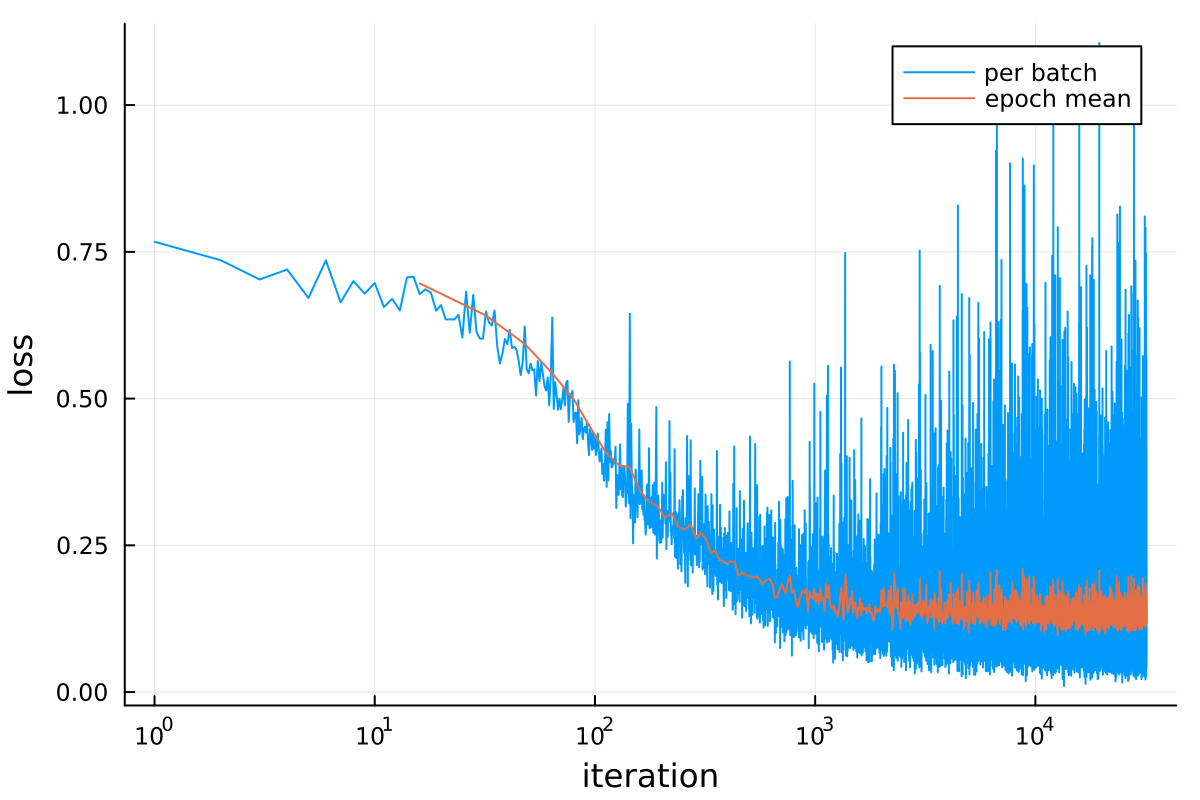

In [87]:
# Training loop, using the whole data set 1000 times:
@showprogress for epoch in 1:1_000
    for (x, y) in loader
        loss, grads = Flux.withgradient(model) do m
            # Evaluate model and loss inside gradient context:
            y_hat = m(x)
            Flux.crossentropy(y_hat, y)
        end
        Flux.update!(optim, model, grads[1])
        push!(losses, loss)  # logging, outside gradient context
    end
end

optim # parameters, momenta and output have all changed

plot(losses; xaxis=(:log10, "iteration"),
    yaxis="loss", label="per batch")
n = length(loader)
plot!(n:n:length(losses), mean.(Iterators.partition(losses, n)),
    label="epoch mean", dpi=200)

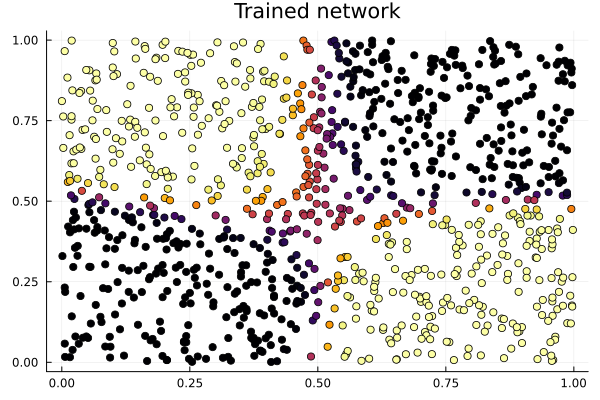

In [85]:
out2 = model(noisy)
scatter(noisy[1,:], noisy[2,:], zcolor=out2[1,:], title="Trained network", legend=false)

In [86]:
accuracy(out) = mean((out[1,:] .> 0.5) .== truth)
accuracy(out1), accuracy(out2)

(0.533, 0.967)

Further details about the Flux ecosystem can be found at [fluxml.ai](https://fluxml.ai/)

# Thank you

Next is [2. How to use Julia directly at Kaggle](https://www.kaggle.com/stephansahm/titanic-tutorial-julia-version).

If you have any questions, you can reach me at stephan.sahm@jolin.io